In [45]:
import pickle
import pandas as pd
import yaml
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('../src')
from portfolio_opt_methods import mv_portfolio

In [50]:
folder = '6. 24.07 | 17-51 | pinnacle-2019-2021-equal_weights'

In [51]:
with open('../conf/analysis.yaml', 'r') as file:
    full_conf = yaml.safe_load(file)

In [52]:
returns_full = pd.read_csv(f'../output-scratch/{folder}/returns.csv')
returns_full['Date'] = pd.to_datetime(returns_full['Date'])  
returns_full.index  = returns_full['Date']
returns_full.drop(columns=['Date'], inplace=True)

In [53]:
with open(f'../output-scratch/{folder}/port_cov.pkl', 'rb') as f:
    port_cov = pickle.load(f)

# returns

In [54]:
period_good = '2019-01-03-2019-12-20'
period_entire = '2019-01-01-2021-12-31'

period = period_good

period_start = period[:10]
period_end = period[11:]

print(period_start)
print(period_end)

2021-02-04
2022-01-21


In [55]:
returns = returns_full[returns_full.index >= period_start]
returns = returns[returns.index <= period_end]
Y = returns

In [56]:
Y.shape

(237, 50)

In [57]:
# Y.drop(columns=['EN'], inplace=True)

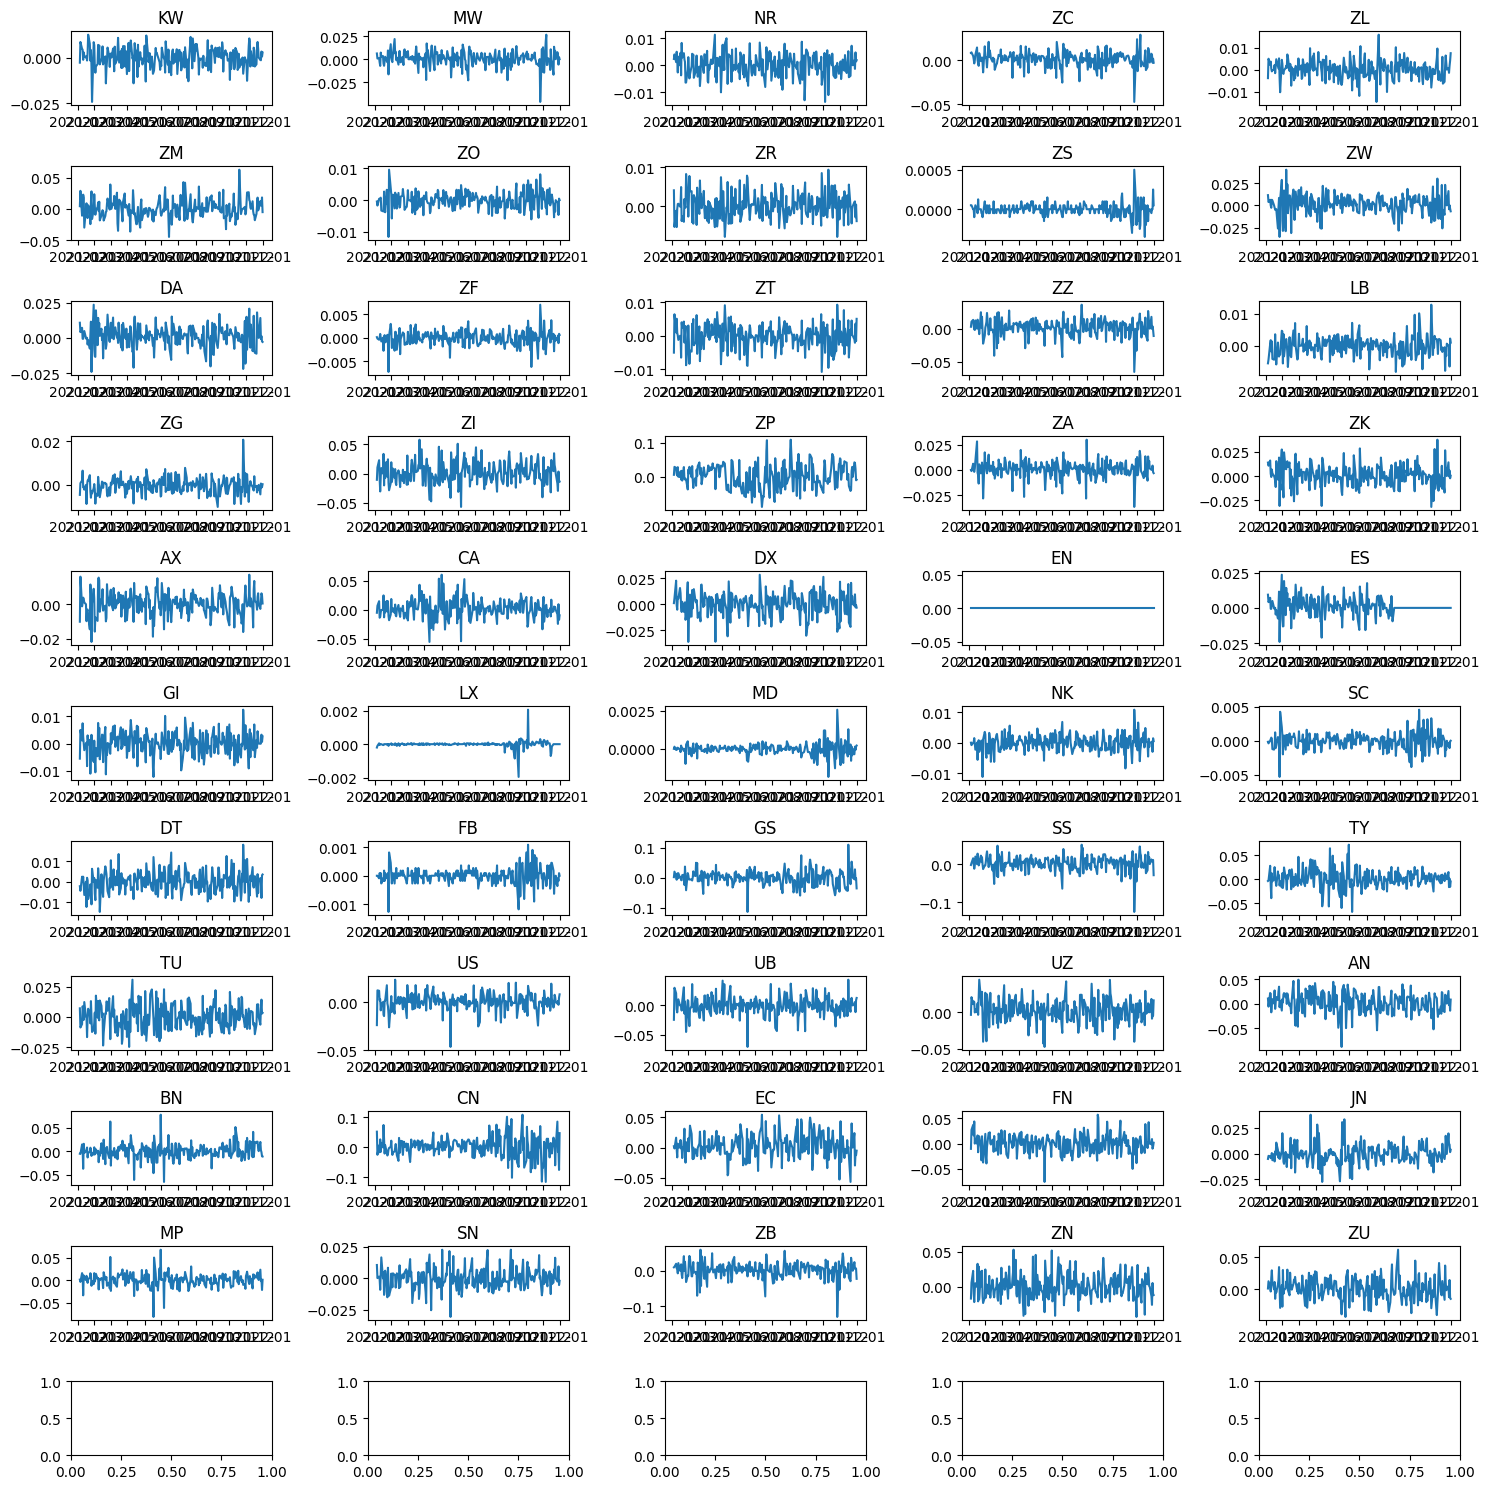

In [58]:
fig, axs = plt.subplots(round(Y.shape[1] / 5) + 1, 5, figsize=(15, 15)) # Creating a 5x5 subplots
axs = axs.ravel() # to iterate over the 5x5 matrix easily

for i in range(Y.shape[1]): # Iterate through each subplot
    axs[i].plot(Y.iloc[:, i]) # Plot the i-th column time series on the i-th subplot
    axs[i].set_title(Y.columns[i]) # Set the title to the column name

plt.tight_layout() # To prevent overlapping labels
plt.show() # Show the plot

In [59]:
w , port_cov_window = mv_portfolio(Y, full_conf['mv_config'])


2021-02-04
2021-12-31
You must convert self.cov to a positive definite matrix
weights index unsuccessful for 2021-02-04-2021-12-31. weights.tail(1).T used.



# port_cov

In [60]:
port_cov[period]

KeyError: '2021-02-04-2022-01-21'